In [14]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

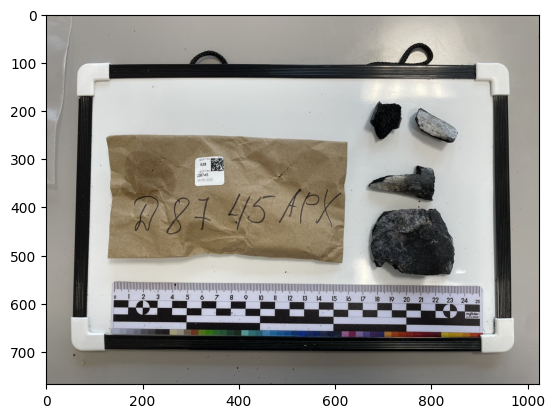

In [18]:
images = ['../Data/528.jpeg', '../Data/1084.jpg', '../Data/12146_И6125.jpg', '../Data/1753.jpeg', '../Data/12245_И6774.jpg',
          '../Data/12145_И6666.jpg', '../Data/1038.jpg','../Data/12173_И4242.jpg', '../Data/20250805_101846.jpg',
         '../Data/12156_И4559.jpg', '../Data/1038.jpg']


image = images[0]

template = './ruler_template-h.png'

img = cv2.imread(image)

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

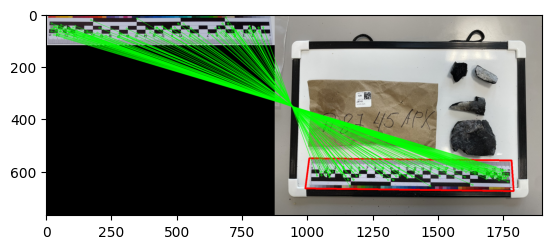

In [19]:
#%%time
MIN_MATCH_COUNT = 500
#img1 = cv2.imread(template, cv2.IMREAD_GRAYSCALE)          # queryImage
#img2 = cv2.imread(image, cv2.IMREAD_GRAYSCALE)[0:500,:]  # trainImage


img1 = cv2.imread(template)          # queryImage
img2 = cv2.imread(image)  # trainImage

# Initiate SIFT detector
sift = cv2.SIFT_create()



# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks = 50)
flann = cv2.FlannBasedMatcher(index_params, search_params)
matches = flann.knnMatch(des1,des2,k=2)



# store all the good matches as per Lowe's ratio test.
good = []
for m,n in matches:
    if m.distance < n.distance:
        good.append(m)

if len(good)>MIN_MATCH_COUNT:
    src_pts = np.float32([ kp1[m.queryIdx].pt for m in good ]).reshape(-1,1,2)
    dst_pts = np.float32([ kp2[m.trainIdx].pt for m in good ]).reshape(-1,1,2)
    M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC,5.0)
    matchesMask = mask.ravel().tolist()
    h,w = img1.shape[0:2]
    pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)
    dst = cv2.perspectiveTransform(pts,M)
    img2 = cv2.polylines(img2,[np.int32(dst)],True,255,3, cv2.LINE_AA)
else:
    print( "Not enough matches are found - {}/{}".format(len(good), MIN_MATCH_COUNT) )
    matchesMask = None

img3 = cv2.imread(template)          # queryImage
img4 = cv2.imread(image) # trainImage

#img4 = cv2.polylines(img4,[np.int32(dst)],True,(0,0,255),10, cv2.LINE_AA)
img4 = cv2.drawContours(img4,[np.int32(dst)],0,(0,0,255),5)


draw_params = dict(matchColor = (0,255,0), # draw matches in green color
                   singlePointColor = None,
                   matchesMask = matchesMask, # draw only inliers
                   flags = 2)


img4 = cv2.drawMatches(img3,kp1,img4,kp2,good,None,**draw_params)
plt.imshow(cv2.cvtColor(img4, cv2.COLOR_BGR2RGB))
plt.show()

In [20]:
cv2.imwrite('res.png', img3)

True

In [22]:
dst=np.int32(dst.reshape(-1,2))

In [24]:
dst

array([[915, 676],
       [907, 559],
       [132, 551],
       [117, 666]], dtype=int32)

In [25]:
cv2.minAreaRect(dst)

((516.7323608398438, 612.5592651367188),
 (798.062744140625, 116.89057159423828),
 0.7179545760154724)

In [28]:
dst[:,0]

array([915, 907, 132, 117], dtype=int32)